In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

import pandas as pd
import seaborn as sns
import matplotlib

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42  # Use Type 42 (TrueType) instead of Type 3
matplotlib.rcParams['ps.fonttype'] = 42  # Use Type 42 for .eps as well

In [3]:
# Define your volume calculation function
# Define the volume calculation function
def volume_calc(prediction, spacing):
    # Calculate the total volume in milliliters
    volume = np.sum(prediction > 0) * (spacing[0] * spacing[1] * spacing[2]) * 0.001
    return volume


In [4]:
pwd

'/home/jupyter-piecuch-l/ImplicitFunction/casename_files/DIASEM/RF'

In [5]:

# Load IDs from text file
id_file_path = "./sarcopenia_subj_DIASEM.txt"
with open(id_file_path, "r") as f:
    ids = [line.strip() for line in f if line.strip()]  # Read each line and strip whitespace

# Directory containing the .nii.gz files
directory = "../../../data/data_DIASEM/renamed_data/RF/labels_registered_turned/"

In [6]:
id_file_path

'./sarcopenia_subj_DIASEM.txt'

In [7]:
# Initialize lists to hold data for the DataFrame
data = []

# Loop through IDs, calculate volumes, and store data
for id in ids:
    filename = f"{id}.nii.gz"  # assuming the filename pattern
    #print(filename)
    file_path = os.path.join(directory, filename)
    
    if os.path.exists(file_path):
        print(filename)
        img = nib.load(file_path)
        data_array = img.get_fdata()
        spacing = img.header.get_zooms()[:3]
        volume = volume_calc(data_array, spacing)
        data.append({"ID": id, "Volume": volume, "Group": "Sarcopenia Dataset"})



AL135_RF.nii.gz
AM112_RF.nii.gz
BA137_RF.nii.gz
BM103_RF.nii.gz
CY164_RF.nii.gz
DI154_RF.nii.gz
DP172_RF.nii.gz
DR160_RF.nii.gz
EM151_RF.nii.gz
EP105_RF.nii.gz
FO117_RF.nii.gz
GD171_RF.nii.gz
LA134_RF.nii.gz
LA162_RF.nii.gz
LJ139_RF.nii.gz
LP133_RF.nii.gz
MA119_RF.nii.gz
MM170_RF.nii.gz
PG161_RF.nii.gz
PP104_RF.nii.gz
QP108_RF.nii.gz
RA150_RF.nii.gz
RJ136_RF.nii.gz
SC146_RF.nii.gz


In [8]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

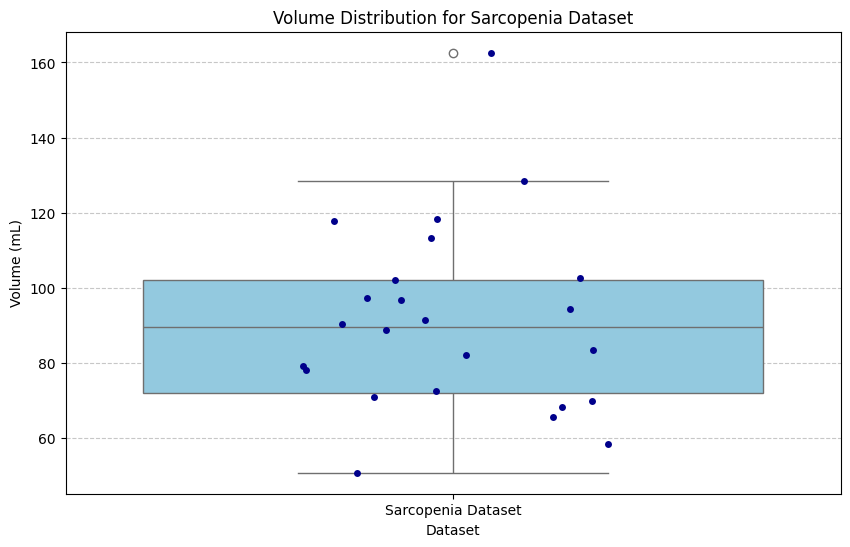

In [9]:
# Plotting the boxplot with seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="Volume", data=df, color="skyblue")

# Overlay individual volume values as points
sns.stripplot(x="Group", y="Volume", data=df, color="darkblue", jitter=0.2, size=5)

# Add horizontal grid lines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels and title
plt.xlabel("Dataset")
plt.ylabel("Volume (mL)")
plt.title("Volume Distribution for Sarcopenia Dataset")
plt.show()

volumes = []

# Loop through each ID and find the matching files
for id in ids:
    filename = f"{id}_RF.nii.gz"
    print(filename)
    file_path = os.path.join(directory, filename)
    
    if os.path.exists(file_path):
        # Load the file
        img = nib.load(file_path)
        data = img.get_fdata()
        spacing = img.header.get_zooms()[:3]  # Get voxel spacing
        
        # Calculate volume
        vol = volume_calc(data, spacing)
        volumes.append(vol)



In [10]:
# Load IDs from all.txt
id_file_path_all = "./RF_all_suj_ordonnes.txt"
with open(id_file_path_all, "r") as f:
    ids = [line.strip() for line in f if line.strip()]  # Read each line and strip whitespace

# Directory containing the .nii.gz files
directory = "../../../data/data_DIASEM/renamed_data/RF/"


In [11]:
# Initialize lists to hold data for the DataFrame
data_2 = []

# Separate IDs into two groups and calculate volumes
for id in ids:
    if id.startswith("sujet"):
        filename = f"{id}_3DUS.nii.gz"
        print(filename)
        group = "Healthy subjects"
    else:
        filename = f"{id}.nii.gz"
        print(filename)
        group = "Patients without sarcopenia"
    
    file_path = os.path.join(directory, filename)
    print (file_path)
    if os.path.exists(file_path):
        print (file_path)
        img = nib.load(file_path)
        data_array = img.get_fdata()
        spacing = img.header.get_zooms()[:3]
        volume = volume_calc(data_array, spacing)
        data_2 .append({"ID": id, "Volume (mL)": volume, "Group": group})

# Create a DataFrame from the data
df2 = pd.DataFrame(data_2 )



AL135_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/AL135_RF.nii.gz
AM112_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/AM112_RF.nii.gz
BA122_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/BA122_RF.nii.gz
BA137_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/BA137_RF.nii.gz
BC167_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/BC167_RF.nii.gz
BH116_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/BH116_RF.nii.gz
BJ128_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/BJ128_RF.nii.gz
BM103_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/BM103_RF.nii.gz
BP149_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/BP149_RF.nii.gz
CG115_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/CG115_RF.nii.gz
CG147_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/CG147_RF.nii.gz
CR159_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/CR159_RF.nii.gz
CS102_RF.nii.gz
../../../data/data_DIASEM/renamed_data/RF/CS102_RF.nii.gz
CY164_RF.nii.gz
../../../data/data_DIA

In [12]:
data_2

[]

In [13]:
df2

""


In [14]:
# Change column name in df2
df2.rename(columns={'Volume (mL)': 'Volume'}, inplace=True)



In [15]:
# Combine all three DataFrames
final_combined_df = pd.concat([df, df2], ignore_index=True)

In [16]:
final_combined_df

,ID,Volume,Group
0,AL135_RF,97.397588,Sarcopenia Dataset
1,AM112_RF,128.531558,Sarcopenia Dataset
2,BA137_RF,83.490005,Sarcopenia Dataset
3,BM103_RF,50.829958,Sarcopenia Dataset
4,CY164_RF,118.219920,Sarcopenia Dataset
5,DI154_RF,102.682298,Sarcopenia Dataset
6,DP172_RF,70.962689,Sarcopenia Dataset
7,DR160_RF,162.587164,Sarcopenia Dataset
8,EM151_RF,94.362104,Sarcopenia Dataset
9,EP105_RF,117.843432,Sarcopenia Dataset


In [17]:
print(final_combined_df.columns)

Index(['ID', 'Volume', 'Group'], dtype='object')


In [18]:
final_combined_df.columns = final_combined_df.columns.str.strip()

/tmp/ipykernel_3770599/373301780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Volume", data=final_combined_df, palette="Set1", fliersize=0)  # Using fliersize=0 to hide outliers from the boxplot


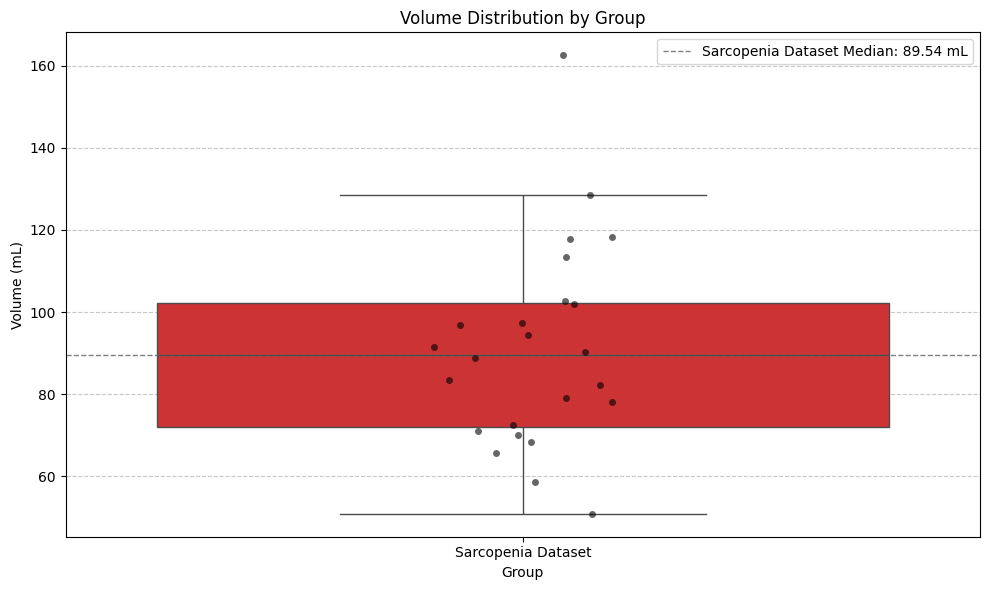

In [19]:
# Create a boxplot with improved colors
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="Volume", data=final_combined_df, palette="Set1", fliersize=0)  # Using fliersize=0 to hide outliers from the boxplot

# Add individual data points using stripplot
sns.stripplot(x="Group", y="Volume", data=final_combined_df, color="black", alpha=0.6, size=5, jitter=True)

# Add horizontal lines at the median for each group
for group in final_combined_df['Group'].unique():
    median = final_combined_df[final_combined_df['Group'] == group]['Volume'].median()
    plt.axhline(median, linestyle='--', color='gray', linewidth=1, label=f'{group} Median: {median:.2f} mL')

# Improve the appearance of the plot
plt.title("Volume Distribution by Group")
plt.ylabel("Volume (mL)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()

/tmp/ipykernel_3770599/3612625702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Volume", data=final_combined_df, palette="Set1", fliersize=0)


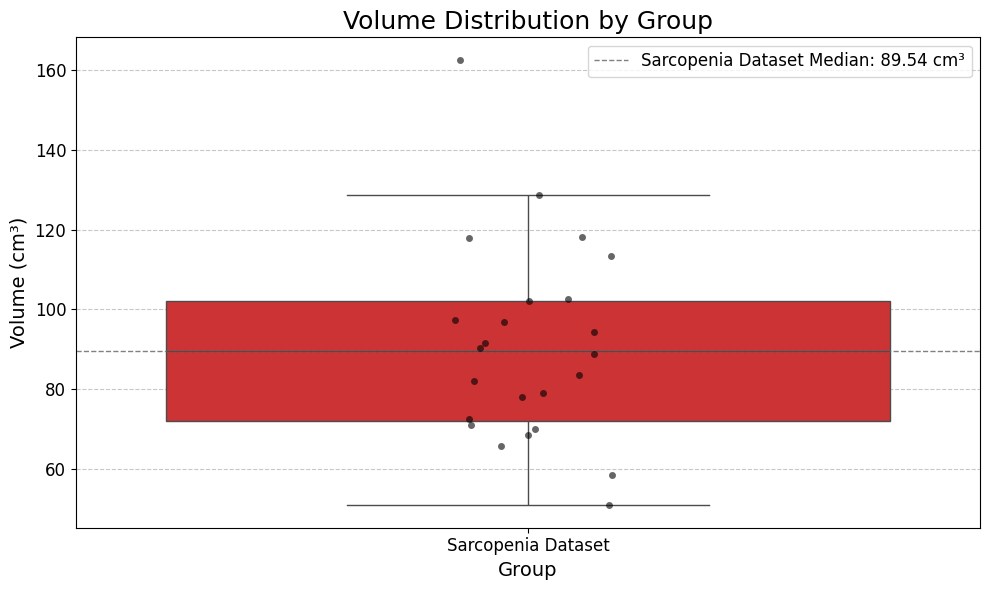

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot with improved colors
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="Volume", data=final_combined_df, palette="Set1", fliersize=0)

# Add individual data points using stripplot
sns.stripplot(x="Group", y="Volume", data=final_combined_df, color="black", alpha=0.6, size=5, jitter=True)

# Add horizontal lines at the median for each group
for group in final_combined_df['Group'].unique():
    median = final_combined_df[final_combined_df['Group'] == group]['Volume'].median()
    plt.axhline(median, linestyle='--', color='gray', linewidth=1, label=f'{group} Median: {median:.2f} cm³')

# Improve the appearance of the plot
plt.title("Volume Distribution by Group", fontsize=18)
plt.xlabel("Group", fontsize=14)
plt.ylabel("Volume (cm³)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [21]:
final_combined_df

,ID,Volume,Group
0,AL135_RF,97.397588,Sarcopenia Dataset
1,AM112_RF,128.531558,Sarcopenia Dataset
2,BA137_RF,83.490005,Sarcopenia Dataset
3,BM103_RF,50.829958,Sarcopenia Dataset
4,CY164_RF,118.219920,Sarcopenia Dataset
5,DI154_RF,102.682298,Sarcopenia Dataset
6,DP172_RF,70.962689,Sarcopenia Dataset
7,DR160_RF,162.587164,Sarcopenia Dataset
8,EM151_RF,94.362104,Sarcopenia Dataset
9,EP105_RF,117.843432,Sarcopenia Dataset


In [22]:
# Export the DataFrame to a CSV file
output_file_path = "./final_combined_df.csv"  # Specify your desired output file path
final_combined_df.to_csv(output_file_path, index=False)

print(f"DataFrame exported as {output_file_path}")

DataFrame exported as ./final_combined_df.csv


In [23]:
# List of folds for training and testing
folds = [1, 2, 3, 4, 5]

# Initialize a list to hold the data for each fold
folds_data = []

# Directory containing the text files for folds
train_directory = "./"
test_directory = "./"



In [24]:

# Initialize a list to hold data for each fold
folds_data = []

# Iterate over the specified folds
for fold in folds:
    print(fold)
    
    # Read training subjects for the current fold
    with open(os.path.join(train_directory, f'train_cases_{fold}.txt')) as f:
        train_subjects = [line.strip() for line in f.readlines()]
        
    # Read testing subjects for the current fold
    with open(os.path.join(test_directory, f'test_cases_{fold}.txt')) as f:
        test_subjects = [line.strip() for line in f.readlines()]
        #print("Test Subjects:", test_subjects)
    
    # Filter final_combined_df for training volumes
    train_volumes = final_combined_df[final_combined_df['ID'].isin(train_subjects)][['ID', 'Group', 'Volume']].copy()
    train_volumes['Fold'] = fold  # Add a Fold column
    train_volumes['Type'] = 'Train'  # Add a Type column for differentiation
    #print("Train Volumes:", train_volumes.head())
    
    # Filter final_combined_df for testing volumes
    test_volumes = final_combined_df[final_combined_df['ID'].isin(test_subjects)][['ID', 'Group', 'Volume']].copy()
    test_volumes['Fold'] = fold  # Add a Fold column
    test_volumes['Type'] = 'Test'  # Add a Type column for differentiation
    #print("Test Volumes:", test_volumes.head())
    
    # Combine the train and test volumes for this fold
    combined_volumes = pd.concat([train_volumes, test_volumes], ignore_index=True)
    folds_data.append(combined_volumes)

# Combine all folds data into a single DataFrame
final_folds_df = pd.concat(folds_data, ignore_index=True)

1
2
3
4
5


In [25]:
final_folds_df

,ID,Group,Volume,Fold,Type


In [26]:
# Export the DataFrame to a CSV file
output_file_path = "./final_folds_df.csv"  # Specify your desired output file path
final_folds_df.to_csv(output_file_path, index=False)

print(f"DataFrame exported as {output_file_path}")

DataFrame exported as ./final_folds_df.csv


In [27]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Get unique folds from the DataFrame
unique_folds = final_folds_df['Fold'].unique()

# Create boxplots for each fold
for fold in unique_folds:
    plt.figure(figsize=(12, 6))

    # Filter the data for the current fold
    fold_data = final_folds_df[final_folds_df['Fold'] == fold]
    
    # Plot for training data
    train_data = fold_data[fold_data['Type'] == 'Train']
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=train_data, x='Group', y='Volume', palette="Set2")
    plt.title(f'Fold {fold}: Training Volumes by Group')
    plt.ylabel('Volume (mL)')
    
    # Plot for testing data
    test_data = fold_data[fold_data['Type'] == 'Test']
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=test_data, x='Group', y='Volume', palette="Set2")
    plt.title(f'Fold {fold}: Testing Volumes by Group')
    plt.ylabel('Volume (mL)')

    plt.tight_layout()
    plt.show()

In [29]:
# Create a new column to define categories for plotting
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Patients without sarcopenia"
    else:
        return f"{row['Type']} / Healthy Subject"

final_folds_df['Category'] = final_folds_df.apply(categorize, axis=1)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(16, 8))

# Create a boxplot
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', palette="Set2", dodge=True)

# Add vertical lines to separate folds
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Customize the plot
plt.title('Volume Distribution by Fold, Category (Train/Test and Group)')
plt.xlabel('Fold')
plt.ylabel('Volume (mL)')
plt.legend(title='Category', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Cannot set a DataFrame with multiple columns to the single column Category

In [ ]:
final_combined_df

In [ ]:
# Step 1: Create the sarcopenia_volumes DataFrame
sarcopenia_volumes = final_combined_df[final_combined_df['Group'] == 'Sarcopenia Dataset']

# Check the column names in sarcopenia_volumes
print("Columns in sarcopenia_volumes:", sarcopenia_volumes.columns)



In [ ]:

# Step 2: Create a new column to define categories for plotting in final_folds_df
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Patients without sarcopenia"
    else:
        return f"{row['Type']} / Healthy Subject"

final_folds_df['Category'] = final_folds_df.apply(categorize, axis=1)

# Step 3: Create categories for sarcopenia_volumes
sarcopenia_volumes['Category'] = "Sarcopenia / Patients with sarcopenia"

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(16, 8))

# Create a boxplot for final_folds_df
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', palette="Set2", dodge=True)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), y='Volume', hue='Category', palette="Set1", dodge=True)

# Customize the plot
plt.title('Volume Distribution by Fold, Category (Train/Test and Group)')
plt.xlabel('Fold / Group')
plt.ylabel('Volume (mL)')
plt.legend(title='Category', loc='upper right')
plt.xticks(rotation=45)

# Adjust the x-ticks to include "Sarcopenia" as a category
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)), 
           list(final_folds_df['Fold'].unique()) + ['Sarcopenia'])

plt.tight_layout()
plt.show()


In [ ]:
# Step 2: Create a new column to define categories for plotting in final_folds_df
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Patients without sarcopenia"
    else:
        return f"{row['Type']} / Healthy Subject"

final_folds_df['Category'] = final_folds_df.apply(categorize, axis=1)

# Step 3: Create categories for sarcopenia_volumes
sarcopenia_volumes['Category'] = "Sarcopenia / Patients with sarcopenia"

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(16, 8))

# Create a boxplot for final_folds_df with lighter colors
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
            palette="pastel", dodge=True)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
            y='Volume', hue='Category', dodge=True, 
            palette={"Sarcopenia / Patients with sarcopenia": "red"}, 
            hue_order=["Sarcopenia / Patients with sarcopenia"])  # Ensures the correct color mapping

# Add individual volume values as darker points without including them in the legend
sns.stripplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
plt.title('Volume Distribution by Fold, Category (Train/Test and Group)')
plt.ylabel('Volume (mL)')
plt.legend(title='Category', loc='upper right')
plt.xticks(rotation=45)

# Adjust the x-ticks to include "Sarcopenia" as a category
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)), 
           list(final_folds_df['Fold'].unique()) + ['Sarcopenia'])

plt.tight_layout()
plt.show()

In [ ]:
# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(22, 8))

# Create a boxplot for final_folds_df with lighter colors
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
            palette="pastel", dodge=True)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
            y='Volume', hue='Category', dodge=True, 
            palette={"Sarcopenia / Patients with sarcopenia": "red"}, 
            hue_order=["Sarcopenia / Patients with sarcopenia"])  # Ensures the correct color mapping

# Add individual volume values as darker points without including them in the legend
sns.stripplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
plt.title('Volume Distribution by Fold, Category (Train/Test and Group)', fontsize=16)
plt.ylabel('Volume (mL)', fontsize=20)
plt.xlabel('Fold', fontsize=20)

# Position the legend outside the boxplot
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=16, title_fontsize=18)

# Adjust the x-ticks to include "Sarcopenia" as a category
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)), 
           list(final_folds_df['Fold'].unique()) + ['Sarcopenia'], fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()


In [ ]:
# Step 2: Create a new column to define categories for plotting in final_folds_df
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Older Adults without sarcopenia"
    else:
        return f"{row['Type']} / Younger Adults"

final_folds_df['Category'] = final_folds_df.apply(categorize, axis=1)

# Step 3: Create categories for sarcopenia_volumes
sarcopenia_volumes['Category'] = "Sarcopenia / Older Adults with sarcopenia"

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(13, 8))

# Create a boxplot for final_folds_df with lighter colors
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
            palette="pastel", dodge=True)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
            y='Volume', hue='Category', dodge=True, 
            palette={"Sarcopenia / Older Adults with sarcopenia": "red"}, 
            hue_order=["Sarcopenia / Older Adults with sarcopenia"])  # Ensures the correct color mapping

# Add individual volume values as darker points without including them in the legend
sns.stripplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
plt.xlabel('')
plt.ylabel('Volume (mL)', fontsize=18)
plt.legend(title='Category', loc='upper right', fontsize=18, title_fontsize=20)

# Adjust the x-ticks to include "Fold 1", "Fold 2", ..., and "Sarcopenia"
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)),
           [f"Fold {fold}" for fold in final_folds_df['Fold'].unique()] + ['Sarcopenia'], fontsize=18)

plt.yticks(fontsize=18)
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Add title "Fig. 4" in the upper left
plt.text(-0.4, max(final_folds_df['Volume'].max(), sarcopenia_volumes['Volume'].max()) * 1.05, 
         "Fig. 4", fontsize=18, fontweight='bold')

# Show the plot
plt.show()

In [ ]:
# Step 1: Apply category assignment only to Fold 1
final_folds_df_fold1 = final_folds_df[final_folds_df['Fold'] == 1].copy()
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Older Adults without sarcopenia"
    else:
        return f"{row['Type']} / Younger Adults"

final_folds_df_fold1['Category'] = final_folds_df_fold1.apply(categorize, axis=1)

# Step 2: Create categories for sarcopenia_volumes
sarcopenia_volumes['Category'] = "Sarcopenia / Older Adults with sarcopenia"

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(10, 6))

# Create a boxplot for final_folds_df_fold1 with lighter colors
sns.boxplot(data=final_folds_df_fold1, x='Fold', y='Volume', hue='Category', 
            palette="pastel", dodge=True)

# Add a vertical line between fold1 and sarcopenia boxplot
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
            y='Volume', hue='Category', dodge=True, 
            palette={"Sarcopenia / Older Adults with sarcopenia": "red"}, 
            hue_order=["Sarcopenia / Older Adults with sarcopenia"])  # Ensures the correct color mapping

# Add individual volume values as darker points without including them in the legend
sns.stripplot(data=final_folds_df_fold1, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
plt.xlabel('')
plt.ylabel('Volume (mL)', fontsize=18)

# Adjust the legend: smaller size, positioned at the upper right
plt.legend(title='Category', loc='upper right', fontsize=13, title_fontsize=15, frameon=True)

# Adjust the x-ticks to include only "Fold 1" and "Sarcopenia"
plt.xticks([0, 1], ["Fold 1", "Sarcopenia"], fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# Add "Fig. 4" INSIDE the plot (upper left, relative to axes)
plt.gca().text(0.02, 0.95, "Fig. 4", fontsize=18, fontweight='bold', color='black', transform=plt.gca().transAxes)

# Save the figure as a PDF
plt.savefig('volume_distribution_fold1_sarcopenia.pdf', format='pdf')

# Show the plot
plt.show()


In [ ]:
# Step 2: Create a new column to define categories for plotting in final_folds_df
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Patients without sarcopenia"
    else:
        return f"{row['Type']} / Healthy Subject"

final_folds_df['Category'] = final_folds_df.apply(categorize, axis=1)

# Step 3: Create categories for sarcopenia_volumes
sarcopenia_volumes['Category'] = "Sarcopenia / Patients with sarcopenia"

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(13, 8))

# Create a boxplot for final_folds_df with lighter colors
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
            palette="pastel", dodge=True)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
            y='Volume', hue='Category', dodge=True, 
            palette={"Sarcopenia / Patients with sarcopenia": "red"}, 
            hue_order=["Sarcopenia / Patients with sarcopenia"])  # Ensures the correct color mapping

# Add individual volume values as darker points without including them in the legend
sns.stripplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
#plt.title('Volume Distribution by Fold, Category (Train/Test and Group)')
plt.xlabel('')
plt.ylabel('Volume (mL)', fontsize=18)
plt.legend(title='Category', loc='upper right', fontsize=18, title_fontsize=20)


#plt.xticks(rotation=45)

# Adjust the x-ticks to include "Sarcopenia" as a category
# Adjust the x-ticks to include "Fold 1", "Fold 2", ..., and "Sarcopenia"
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)),
           [f"Fold {fold}" for fold in final_folds_df['Fold'].unique()] + ['Sarcopenia'], fontsize=18)

plt.yticks(fontsize=18)
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Show the plot
plt.show()


In [ ]:
# Step 2: Create a new column to define categories for plotting in final_folds_df
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Patients without sarcopenia"
    else:
        return f"{row['Type']} / Healthy Subject"

final_folds_df['Category'] = final_folds_df.apply(categorize, axis=1)

# Step 3: Create categories for sarcopenia_volumes
sarcopenia_volumes['Category'] = "Sarcopenia / Patients with sarcopenia"

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(23, 8))

# Create a boxplot for final_folds_df with lighter colors
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
            palette="pastel", dodge=True)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
            y='Volume', hue='Category', dodge=True, 
            palette={"Sarcopenia / Patients with sarcopenia": "red"}, 
            hue_order=["Sarcopenia / Patients with sarcopenia"])  # Ensures the correct color mapping

# Add individual volume values as darker points without including them in the legend
sns.stripplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
plt.xlabel('')
plt.ylabel('Volume (mL)', fontsize=22)



# Adjust the x-ticks to include "Sarcopenia" as a category
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)), 
           list(final_folds_df['Fold'].unique()) + ['Sarcopenia'], fontsize=22)
plt.yticks(fontsize=18)

# Position the legend outside the boxplot
plt.legend(title='Category', loc='upper left', fontsize=16, title_fontsize=18)

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Show the plot
plt.show()

In [ ]:
# Step 2: Create a new column to define categories for plotting in final_folds_df
def categorize(row):
    if 'Patients without sarcopenia' in row['Group']:
        return f"{row['Type']} / Elderly without sarcopenia"
    else:
        return f"{row['Type']} / Young Subject"

final_folds_df['Category'] = final_folds_df.apply(categorize, axis=1)

# Step 3: Create categories for sarcopenia_volumes
sarcopenia_volumes.loc[:, 'Category'] = "Sarcopenia / Elderly with sarcopenia"

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(23, 10))

# Create a boxplot for final_folds_df with lighter colors
sns.boxplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
            palette="pastel", dodge=True)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, olor='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
sns.boxplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
            y='Volume', hue='Category', dodge=True, 
            palette={"Sarcopenia / Elderly with sarcopenia": "red"}, 
            hue_order=["Sarcopenia / Elderly with sarcopenia"])

# Add individual volume values as darker points without including them in the legend
sns.stripplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
plt.xlabel('')
plt.ylabel('Volume (mL)', fontsize=22)

# Adjust the x-ticks to include "Sarcopenia" as a category
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)), 
           list(final_folds_df['Fold'].unique()) + ['Sarcopenia'], fontsize=22)
plt.yticks(fontsize=18)

# Position the legend higher in the figure to avoid overlapping outliers
plt.legend(title='Category', loc='upper center', bbox_to_anchor=(0.5, 1.25), 
           fontsize=18, title_fontsize=20, ncol=2)

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Show the plot
plt.show()

In [ ]:
import matplotlib 
# Use Type 1 fonts instead of Type 3 or TrueType (Type 42)
matplotlib.rcParams['pdf.fonttype'] = 42  # Force Type 1 fonts in PDF
matplotlib.rcParams['ps.fonttype'] = 42  # Force Type 1 fonts in EPS

# Use a standard Type 1 font like Times
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times']

In [ ]:
# Replace "Elderly" with "Older adults" and "Young Subject" with "Young adults" in the DataFrames
final_folds_df['Category'] = final_folds_df['Category'].replace({
    "Train / Elderly without sarcopenia": "Train / Older adults without sarcopenia",
    "Test / Elderly without sarcopenia": "Test / Older adults without sarcopenia",
    "Train / Young Subject": "Train / Young adults",
    "Test / Young Subject": "Test / Young adults"
})

sarcopenia_volumes['Category'] = sarcopenia_volumes['Category'].replace({
    "Sarcopenia / Elderly with sarcopenia": "Sarcopenia / Older adults with sarcopenia"
})

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplotsipplot(data=final_folds_df, x='Fold', y='Volume', hue='Category', 
              palette="Set2", dodge=True, alpha=0.9, size=5, jitter=True, color='black', 
              legend=False)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(data=sarcopenia_volumes, x=['Sarcopenia'] * len(sarcopenia_volumes), 
              y='Volume', hue='Category', dodge=True, 
              alpha=0.9, size=5, jitter=True, color='black', legend=False)

# Customize the plot
#plt.title('Volume Distribution by Fold, Category (Train/Test and Group)')
plt.xlabel('')
plt.ylabel('Volume (mL)')
plt.legend(title='Category', loc='upper right')
#plt.xticks(rotation=45)

# Adjust the x-ticks to include "Sarcopenia" as a category
plt.xticks(list(range(len(final_folds_df['Fold'].unique()) + 1)), 
           list(final_folds_df['Fold'].unique()) + ['Sarcopenia'])

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Show the plot
plt.figure(figsize=(23, 10))

# Create a boxplot for final_folds_df with lighter colors
boxplot1 = sns.boxplot(
    data=final_folds_df,
    x='Fold',
    y='Volume',
    hue='Category',
    palette="pastel",
    dodge=True
)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
boxplot2 = sns.boxplot(
    data=sarcopenia_volumes,
    x=['Sarcopenia'] * len(sarcopenia_volumes),
    y='Volume',
    hue='Category',
    dodge=True,
    palette={"Sarcopenia / Older adults with sarcopenia": "red"},
    hue_order=["Sarcopenia / Older adults with sarcopenia"]
)

# Add individual volume values as darker points without including them in the legend
sns.stripplot(
    data=final_folds_df,
    x='Fold',
    y='Volume',
    hue='Category',
    palette="Set2",
    dodge=True,
    alpha=0.9,
    size=5,
    jitter=True,
    legend=False
)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(
    data=sarcopenia_volumes,
    x=['Sarcopenia'] * len(sarcopenia_volumes),
    y='Volume',
    hue='Category',
    dodge=True,
    alpha=0.9,
    size=5,
    jitter=True,
    color='black',
    legend=False
)

# Customize the plot
plt.xlabel('')
plt.ylabel('Volume (mL)', fontsize=22)

# Adjust the x-ticks to include "Fold_1", "Fold_2", ..., "Sarcopenia" as categories
plt.xticks(
    list(range(len(final_folds_df['Fold'].unique()) + 1)),
    [f"Fold_{fold}" for fold in final_folds_df['Fold'].unique()] + ['Sarcopenia'],
    fontsize=22
)
plt.yticks(fontsize=18)

# Extract colors from the boxplots for the legend commends you print this screen for your records.


handles, labels = boxplot1.get_legend_handles_labels()
handles2, labels2 = boxplot2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)

# Reorder legend items to match desired order
desired_order = [
    "Train / Older adults without sarcopenia",
    "Test / Older adults without sarcopenia",
    "Train / Young adults",
    "Test / Young adults",
    "Sarcopenia / Older adults with sarcopenia"
]
handles = [handles[labels.index(label)] for label in desired_order]
labels = [label for label in desired_order]

# Create the legend with desired layout
plt.legend(
    handles=handles,
    labels=labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    fontsize=22,
    title="Category",
    title_fontsize=24,
    ncol=3,
    handletextpad=1.5,
    columnspacing=2,
    frameon=False
)

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Show the plot
plt.show()




In [ ]:
final_folds_df = final_folds_df[final_folds_df['Fold'] == 1] 

In [ ]:
# Replace "Elderly" with "Older adults" and "Young Subject" with "Young adults" in the DataFrames
final_folds_df['Category'] = final_folds_df['Category'].replace({
    "Train / Elderly without sarcopenia": "Train / Older adults without sarcopenia",
    "Test / Elderly without sarcopenia": "Test / Older adults without sarcopenia",
    "Train / Young Subject": "Train / Young adults",
    "Test / Young Subject": "Test / Young adults"
})

sarcopenia_volumes['Category'] = sarcopenia_volumes['Category'].replace({
    "Sarcopenia / Elderly with sarcopenia": "Sarcopenia / Older adults with sarcopenia"
})

# Optional: Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure for the combined boxplots
plt.figure(figsize=(18, 10))

# Create a boxplot for final_folds_df with lighter colors
boxplot1 = sns.boxplot(
    data=final_folds_df,
    x='Fold',
    y='Volume',
    hue='Category',
    palette="pastel",
    dodge=True
)

# Add vertical lines to separate folds for final_folds_df
for i in range(len(final_folds_df['Fold'].unique()) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

# Add a vertical line between folds and sarcopenia boxplot
plt.axvline(x=len(final_folds_df['Fold'].unique()) - 0.5, color='black', linestyle='--', linewidth=2)

# Create a boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
boxplot2 = sns.boxplot(
    data=sarcopenia_volumes,
    x=['Sarcopenia'] * len(sarcopenia_volumes),
    y='Volume',
    hue='Category',
    dodge=True,
    palette={"Sarcopenia / Older adults with sarcopenia": "red"},
    hue_order=["Sarcopenia / Older adults with sarcopenia"]
)

# Add individual volume values as darker points without including them in the legend
sns.stripplot(
    data=final_folds_df,
    x='Fold',
    y='Volume',
    hue='Category',
    palette="Set2",
    dodge=True,
    alpha=0.9,
    size=5,
    jitter=True,
    legend=False
)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(
    data=sarcopenia_volumes,
    x=['Sarcopenia'] * len(sarcopenia_volumes),
    y='Volume',
    hue='Category',
    dodge=True,
    alpha=0.9,
    size=5,
    jitter=True,
    color='black',
    legend=False
)

# Customize the plot
plt.xlabel('')
plt.ylabel('Volume (mL)', fontsize=20)

# Adjust the x-ticks to include "Fold_1", "Fold_2", ..., "Sarcopenia" as categories
plt.xticks(
    list(range(len(final_folds_df['Fold'].unique()) + 1)),
    [f"Fold_{fold}" for fold in final_folds_df['Fold'].unique()] + ['Sarcopenia'],
    fontsize=22
)
plt.yticks(fontsize=18)

# Extract colors from the boxplots for the legend commends you print this screen for your records.


handles, labels = boxplot1.get_legend_handles_labels()
handles2, labels2 = boxplot2.get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)

# Reorder legend items to match desired order
desired_order = [
    "Train / Older adults without sarcopenia",
    "Test / Older adults without sarcopenia",
    "Train / Young adults",
    "Test / Young adults",
    "Sarcopenia / Older adults with sarcopenia"
]
handles = [handles[labels.index(label)] for label in desired_order]
labels = [label for label in desired_order]

# Create the legend with a reduced size
plt.legend(
    handles=handles,
    labels=labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    fontsize=18,  # Reduced font size for labels
    title="Category",
    title_fontsize=20,  # Reduced font size for title
    ncol=3,
    handletextpad=1.5,
    columnspacing=2,
    frameon=False,
    handlelength=1.5,  # Adjust handle length for smaller legend items
    markerscale=0.8  # Adjust marker size for smaller points in the legend
)

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Show the plot
plt.show()


In [ ]:
# Create a figure for the combined boxplots with reduced size
plt.figure(figsize=(23, 10))

# Create a boxplot for final_folds_df with lighter colors
boxplot1 = sns.boxplot(
    data=final_folds_df,
    x='Fold',
    y='Volume',
    hue='Category',
    palette="pastel",
    dodge=True,
    width=0.6  # Reduce the width of the boxplot for folds (adjust as needed)
)

# Create a smaller boxplot for sarcopenia_volumes, setting the color for Sarcopenia to red
boxplot2 = sns.boxplot(
    data=sarcopenia_volumes,
    x=['Sarcopenia'] * len(sarcopenia_volumes),
    y='Volume',
    hue='Category',
    dodge=True,
    palette={"Sarcopenia / Older adults with sarcopenia": "red"},
    hue_order=["Sarcopenia / Older adults with sarcopenia"],
    width=0.4  # Smaller width for sarcopenia boxplot
)

# Add individual volume values for sarcopenia_volumes as darker points without including them in the legend
sns.stripplot(
    data=sarcopenia_volumes,
    x=['Sarcopenia'] * len(sarcopenia_volumes),
    y='Volume',
    hue='Category',
    dodge=True,
    alpha=0.9,
    size=4,  # Smaller point size for sarcopenia
    jitter=True,
    color='black',
    legend=False
)

# Continue with your existing plot adjustments, legends, and customization

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('volume_distribution_by_fold_category.pdf', format='pdf')

# Show the plot
plt.show()
